# Linear Regression

# Introduction

Let's start with a simple example. Suppose a house width $x_1 m^2$, have $x_2$ bedroom and $x_3$ km away from the city center cost how much?

Assume that we have a dataset of 1000 house in that city, If we have a new house with parameters such as area, number of bedrooms and distance to the center, can we predict the price of that house? If so, then the predicts function $y = f(x)$ will have what form?

In here $\vec{x} = [x_1, x_2, x_3]$ is the input vector and $y$ is the output or scalar value.

In the simplest way, we can see that: i) the larger the house area, the higher the house price; ii) the greater the number of bedrooms, the higher the house price; iii) The farther from the center, the lower the house price. The simplest function that can describe the relationship between house prices and three input quantities is:

$$y \approx f(x) = \hat{y}$$

$$f(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$$

where $w_1, w_2, w_3$ are the weights and $b$ is the bias. The weights and bias are the parameters of the model that we need to learn from the data. The function $f(x)$ is called a linear regression model.

# Mathematic Analysis

### Linear Regression form

In the equation from above, if we set $\vec{w} = [w_1, w_2, w_3, b]$ ($b$ is equal to $w_0\vec{1}$) and $\bar{x} = [x_1, x_2, x_3]$, we can rewrite the equation as:

$$y \approx \bar{x}\vec{w}= \hat{y}$$

### Prediction Error

We expect that the predicted value $\hat{y}$ is close to the true value $y$, and the difference $e$ (error term) as small as possible. The error is defined as:

$$\frac{1}{2}e^2 = \frac{1}{2}(y - \hat{y})^2 = \frac{1}{2}(y - \bar{x}\vec{w})^2$$

Where the factor $\frac{1}{2}$ is used to simplify the derivative calculation. (Will be explained in further sections). $e^2$ because we need a positive value.

### Loss function

The same thing happen to every pair (input, outcome) $(x_i, y_i)$ in the dataset. The loss function is defined as:

$$\mathcal{L}(w) = \frac{1}{2} \sum_{i = 1}^{n} (y_i - \bar{X}_iW)^2$$

Where $n$ is the number of samples in the dataset.

The function $\mathcal{L}(w)$ called loss function of Linear Regression. We alway want the $\mathcal{L}(w)$ is smallest, that mean finding coefficients $\vec{w}$ that minimize the loss function. Denoted as:

$$w^* = \arg\min_{w} \mathcal{L}(w)$$

### Solution for Linear Regression problem

The most common way to find the solution to an optimization problem (we have known since high school) is to solve the zero gradient equation! Of course, that is when calculating the derivative and solving the zero derivative equation are not too complicated. Luckily, with linear models, these two things are possible.

Derivative by $\vec{w}$:

$$\frac{\partial \mathcal{L}(w)}{\partial \vec{w}} = \bar{X}^T(\bar{X}W - \vec{y})$$

This called the normal equation. Which will find the optimal solution for $\vec{w}$ without any iteration. But this have a problem when the number of features is too large, the matrix $\bar{x}^T\bar{x}$ is not invertible. In this case, we can use the gradient descent method to find the optimal solution. (Recommend to Read Gradient Descent - Batch GD in my Optimization folder)

# Example

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/linear_regression_dataset.csv')

In [5]:
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [6]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
print("lr coefficents: ", lr.coef_)
print("lr intercept: ", lr.intercept_)

lr coefficents:  [-107.10955305 2095.42641138]
lr intercept:  31619.09724993968


The <code>intercept_</code> attribute holds the single float number, the <code>coef_</code> attribute is a Numpy array with one entry per input feature.

So after training, we have two slopes and one intercepts, which we can use to predict new data points. Let's take a look at the predictions score:

In [9]:
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.97
Test score: 0.97


Ok so $\mathbb{R}^2$ is a measure of goodness of fit. It's a value between 0 and 1 for no-fit and perfect fit respectively. So we can see that our model is not very good.

## Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients ($w$) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of $w$ should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [15]:
print("ridge coefficents: ", ridge.coef_)
print("ridge intercept: ", ridge.intercept_)

ridge coefficents:  [-104.11613814 2078.47752237]
ridge intercept:  31592.940828781037


In [16]:
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Training score: 0.97
Test score: 0.97


As you can see, the score in both model is the same. But the coefficients are different. Ridge regression applies a penalty to the size of the coefficients, so the coefficients learned by ridge regression are much smaller.

This model is more restricted than linear regression, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the ridge model over the linear regression model.

But we'll have a question: "How much importance the model places on simplicity versus training set performance can be specified by the user?"

Well, the answer is the $\alpha$ parameter. In the previous example, we used the default parameter, $\alpha = 1.0$. There is no reason why this will give us the best trade-off, though. The optimum setting of $\alpha$ depends on the particular dataset we are using. Increasing $\alpha$ forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:

In [20]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)

print("rigde10 coefficents: ", ridge10.coef_)
print("rigde10 intercept: ", ridge10.intercept_)

print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))

rigde10 coefficents:  [ -79.38287591 1937.66561963]
rigde10 intercept:  31380.78568723035
Training score: 0.96
Test score: 0.95


So increasing alpha forces coefficients to move more toward zero, force it more restricted to avoid overfitting. But what about we decrease alpha?

In [22]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)

print("righe01 coefficents: ", ridge01.coef_)
print("righe01 intercept: ", ridge01.intercept_)

print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))

righe01 coefficents:  [-106.80782074 2093.7188261 ]
righe01 intercept:  31616.456393808072
Training score: 0.97
Test score: 0.97


The coefficients and intercept slowly change, a little bit smaller than linear regression. We can easily understand that decrease alpha will make the model less restricted.

We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the `coef_ attribute` of models with different values of alpha. A higher alpha means a more restricted model, so we expect the entries of `coef_` to have smaller magnitude for a high value of alpha than for a low value of alpha

## Lasso

An alternative to Ridge for regularizing linear regression is **Lasso**. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()
lasso.fit(X_train, y_train)

print("lasso coefficents: ", lasso.coef_)
print("lasso intercept: ", lasso.intercept_)

print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))   
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso coefficents:  [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  5.44364352e-05 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.21298988e-03 -4.31901616e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
lasso intercept:  1.3492834500519606
Training score: 0.55
Test score: 0.62
Number of features used: 8


As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of $\alpha = 1.0$. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [34]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.68
Test set score: 0.71
Number of features used: 8


So lower alpha help us to get better score, which worked better on the training data. The performance on the test set is not as good as Ridge, but seem better than the default setting of alpha=1.0. But how about we decrease alpha more since the score is still increasing?

In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.77
Test set score: 0.75
Number of features used: 22


So that's all about our Regression task between three type of linear models. We can see that Ridge and Lasso are more restricted than Linear Regression, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the ridge model over the linear regression model.

# Conclusion

### Problem that can be solve by Linear Regression

Function $y \approx f(x) = w^Tx$ is a linear function by $w$ and $x$. In real world, Linear Regression can be apply for any problem that have linear relationship by $w$:

$$y \approx w_1x_1 + w_2x_2 + w_3x_1^2 + w_4\sin(x_2) + w_5x_1x_2 + w_0$$

With each input $X = [x_1; x_2]$, we calculating new features $[x_1; x_2; x_1^2; \sin(x_2); x_1x_2; 1]$ and apply Linear Regression for this new features.

### Limitation

The first problem with LR is it very sensitive to outliers or noise. If we have a dataset with a lot of outliers, the model will be very bad.

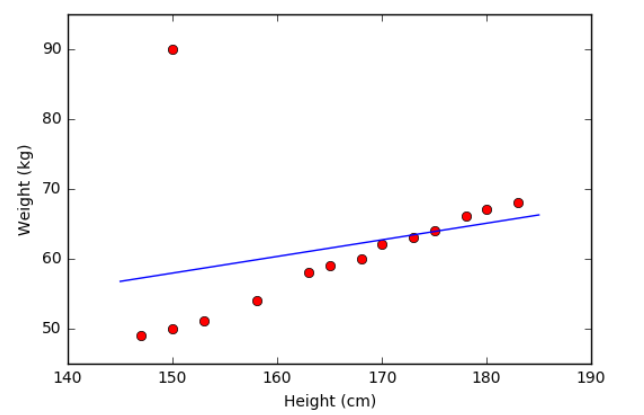

The second one is it cannot represent complex relationship between input and output. If the relationship is not linear, the model will be very bad. Although in the above section we saw that this method can be applied if the relationship between outcome and input is not necessarily linear, this relationship is still much simpler compared to real models.

### Optimization method

Linear Regression is a simple model, the solution for the zero differential equation is also quite simple. In most cases, we cannot solve a zero derivative equation.

But there is one thing we should remember, as long as we can calculate the derivative, there is still hope.

# Logistic Regression

(Note that this part contain some point about PLA - Perceptron Learning Algorithm, which is Notebook number 9 in Supervised Learning folder)

# Introduce

Let's start with another example: A group of 20 students spend between 0 and 6 hours studying for an exam. How does this study time affect the probability that the students will pass the exam?

The results can be collected in a table:

|Hours|Pass|
|-----|----|
|0.5  |0   |
|0.75 |0   |
|1    |0   |
|1.25 |0   |
|1.5  |0   |
|1.75 |0   |
|1.75 |1   |
|2    |0   |
|2.25 |1   |
|2.5  |0   |
|2.75 |1   |
|3    |0   |
|3.25 |1   |
|3.5  |0   |
|4    |1   |
|4.25 |1   |
|4.5  |0   |
|4.75 |1   |
|5    |1   |
|5.5  |1   |

Although it is a bit unfair that you fail after 3.5 hours of study, and pass after 1.75 hours of study, in general, the more you study, the higher your chances of passing. PLA cannot be applied to this problem because it is impossible to say how many hours a person studies to 100% fail or pass, and in fact this data is not linearly separable (a condition for PLA to work). Note that the red and blue points are plotted at different ordinates for illustration purposes.

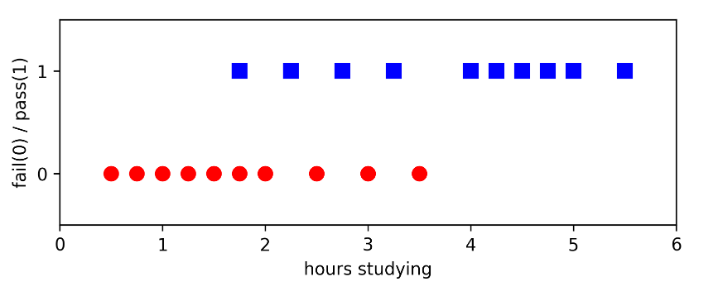

### Logistic Regression model

The predicted output:
- Linear Regression:
$$f(x) = w^Tx$$
- Perceptron:
$$f(x) = \text{sgn}(w^Tx)$$

Then the output of Logistic Regression is:

$$f(x) = \theta(w^Tx)$$

Where $\theta$ is the sigmoid function, which I will explain later

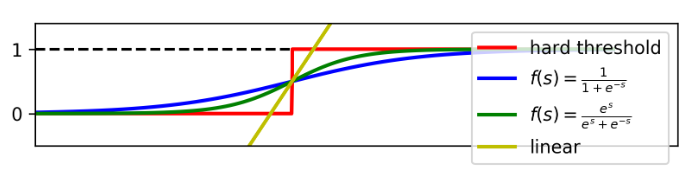

Where yellow line express Linear Regression with no upper bound, which not suitable for this problem. But there is a little trick to make it bounded: cut off the parts less than 0 by setting them to 0, cut off the parts greater than 1 by setting them to 1. Then take the point on this line with the intercept of 0.5 as the dividing point of the two classes, which is also not a good choice. Suppose there are a few more typical students who study for 20 hours and, of course, pass the exam. When applying the linear regression model as shown below and taking the threshold of 0.5 to classify the classes, all the failed students are still predicted to fail, but many students who pass are also predicted to fail (if we consider the green x point as a hard threshold to draw conclusions). Clearly this is a bad model. This typical student has dragged many other students to fail.

Then why Linear Regression not good for this?

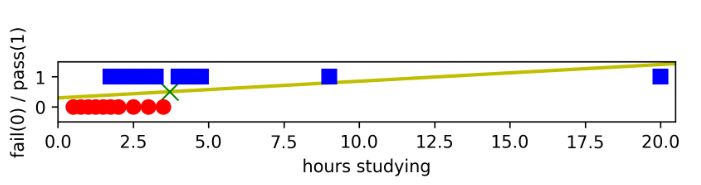

- The red line (which differs from the PLA activation function only in that the two classes are 0 and 1 instead of -1 and 1) is also a hard threshold. PLA does not work for this problem because the given data is not linearly separable.
- The blue and green lines (in the previous picture) are more suitable for our problem. They have several important properties:
    - It is a continuous function that takes on real values, bounded in the interval (0,1).
    - If we consider the point with the coordinate 1/2 as the dividing point, then the points farther to the left of this point have values ​​closer to. Conversely, the points farther to the right of this point have values ​​closer to 1. This is consistent with the observation that the more you study, the higher the probability of passing and vice versa.
    - Smooth should have derivatives everywhere, which can be beneficial in optimization.

### Sigmoid function

With:

$$f(s) = \frac{1}{1 + e^{-s}}$$

Is the most used, because is bounded in the interval (0,1) and have a derivative everywhere. Also:

$$\lim_{s \to -\infty} f(s) = 0$$

$$\lim_{s \to +\infty} f(s) = 1$$

Furthermore:

$$\sigma'(s) = \frac{e^{-s}}{(1 + e^{-s})^2} = \frac{1}{1 + e^{-s}}\left(1 - \frac{1}{1 + e^{-s}}\right) = f(s)(1 - f(s))$$

Beside Sigmoid, Tanh is also a good choice:

$$f(s) = \tanh(s) = \frac{e^s - e^{-s}}{e^s + e^{-s}}$$

This take bounded value in the interval (-1,1) and also have a derivative everywhere. And can be easily converted to Sigmoid:

$$\tanh(s) = 2f(2s) - 1$$

# Loss function and Optimization

In this part, from what I learn from multiple source, it's based on all this component:
- Probability with Bernoulli distribution
- Normal distribution (Gaussian distribution)
- Maximum Likelihood Estimation (MLE)
- Log likelihood

So I'll not continue to explain this part, because I'm not confident to explain it and the knownledge I have right now is like fighting each other (each source have a different explain but it commonly used 4 type above). Maybe it's better if you go and check them out

### Update formula for Logistic Sigmoid Regression

So at the final:

$$\frac{\partial \mathcal{L}(w; x_i, y_i)}{\partial w} = (z_i - y_i)x_i$$

After this it can using any optimization algorithm to find the optimal solution.

# Conclusion

### Logistic Regression frequently used in classification problem

Although it is called Regression, which is a model for fitting, Logistic Regression is used a lot in Classification problems. After finding the model, determining the class $y$ of a input $x$ can be done by:

$$P(y = 1|x; w); P(y = 0|x; w)$$

Because sum of two probability is 1, we can easily determine using a threshold

### Boundary created by Logistic Regression is linear

We will check:

$$P(y = 1|x; w) > 0.5 \\
\Leftrightarrow \frac{1}{1 + e^{-w^Tx}} > 0.5 \\
\Leftrightarrow e^{-w^Tx} < 1 \\
\Leftrightarrow w^Tx > 0$$

In other words, the boundary between two classes is a line with equation $w^Tx$. This is the equation of a hyperplane. So Logistic Regression produces a boundary of linear form.